In [1]:
import pydicom
from pathlib import Path

In [2]:
path = Path("../data/dicom/MR.1.2.246.352.221.49935938239029512209273707636294122625.dcm")
ds = pydicom.dcmread(path)

In [3]:
ds




Dataset.file_meta -------------------------------
(0002,0000) File Meta Information Group Length  UL: 184
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: MR Image Storage
(0002,0003) Media Storage SOP Instance UID      UI: 1.2.246.352.221.49935938239029512209273707636294122625
(0002,0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002,0012) Implementation Class UID            UI: 1.2.246.352.70.2.1.160.3
(0002,0013) Implementation Version Name         SH: 'DCIE 2.2'
-------------------------------------------------
(0008,0005) Specific Character Set              CS: 'ISO_IR 192'
(0008,0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'OTHER']
(0008,0012) Instance Creation Date              DA: '20220622'
(0008,0013) Instance Creation Time              TM: '115004'
(0008,0016) SOP Class UID                       UI: MR Image Storage
(0008,0018) SOP Instance UID               

In [4]:
patient_name = ds[0x0020, 0x000E] 
patient_name.value 

'1.2.246.352.221.547195035259547935315534606453430954673'

In [5]:
print(ds.Columns, ds.Rows)
print(ds.keys())

256 256
dict_keys([(0008,0005), (0008,0008), (0008,0012), (0008,0013), (0008,0016), (0008,0018), (0008,0020), (0008,0023), (0008,0030), (0008,0033), (0008,0050), (0008,0060), (0008,0070), (0008,0090), (0008,1090), (0010,0010), (0010,0020), (0010,0030), (0010,0040), (0012,0062), (0012,0063), (0012,0064), (0018,0010), (0018,0015), (0018,0020), (0018,0021), (0018,0022), (0018,0050), (0018,0081), (0018,0091), (0018,1020), (0018,1040), (0018,5100), (0020,000D), (0020,000E), (0020,0010), (0020,0011), (0020,0013), (0020,0032), (0020,0037), (0020,0052), (0020,1040), (0020,1041), (0028,0002), (0028,0004), (0028,0010), (0028,0011), (0028,0030), (0028,0100), (0028,0101), (0028,0102), (0028,0103), (0028,0303), (0028,1050), (0028,1051), (7FE0,0010)])


In [6]:
# Print all element tags in the dataset
for elem in ds:
    print(f"{elem.tag}: {elem.name} = {elem.value}")

(0008,0005): Specific Character Set = ISO_IR 192
(0008,0008): Image Type = ['ORIGINAL', 'PRIMARY', 'OTHER']
(0008,0012): Instance Creation Date = 20220622
(0008,0013): Instance Creation Time = 115004
(0008,0016): SOP Class UID = 1.2.840.10008.5.1.4.1.1.4
(0008,0018): SOP Instance UID = 1.2.246.352.221.49935938239029512209273707636294122625
(0008,0020): Study Date = 
(0008,0023): Content Date = 
(0008,0030): Study Time = 
(0008,0033): Content Time = 
(0008,0050): Accession Number = 
(0008,0060): Modality = MR
(0008,0070): Manufacturer = GE MEDICAL SYSTEMS
(0008,0090): Referring Physician's Name = 
(0008,1090): Manufacturer's Model Name = DISCOVERY MR750w
(0010,0010): Patient's Name = 01
(0010,0020): Patient ID = uWiqM844A9jDh4pqNrtDs59C2
(0010,0030): Patient's Birth Date = 
(0010,0040): Patient's Sex = 
(0012,0062): Patient Identity Removed = YES
(0012,0063): De-identification Method = De-identified with Varian Medical Systems DICOM Import Export
(0012,0064): De-identification Method Co

Image shape: (256, 256)
Data type: int16
Min pixel value: 0
Max pixel value: 10271


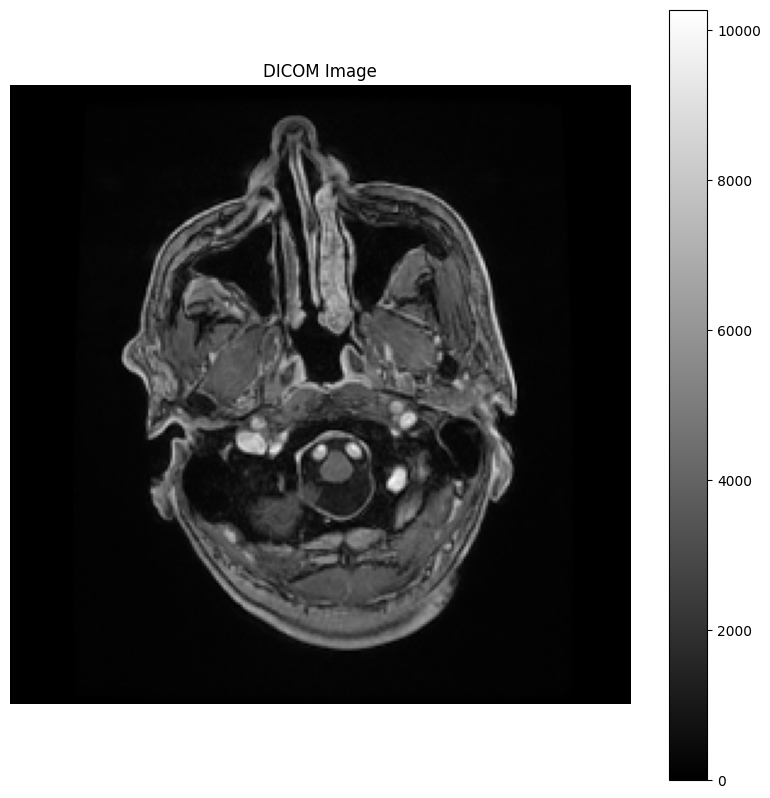

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Extract the pixel array from the DICOM dataset
pixel_array = ds.pixel_array

# Display basic information about the image
print(f"Image shape: {pixel_array.shape}")
print(f"Data type: {pixel_array.dtype}")
print(f"Min pixel value: {pixel_array.min()}")
print(f"Max pixel value: {pixel_array.max()}")

# Display the image
plt.figure(figsize=(10, 10))
plt.imshow(pixel_array, cmap='gray')
plt.colorbar()
plt.title('DICOM Image')
plt.axis('off')
plt.show()

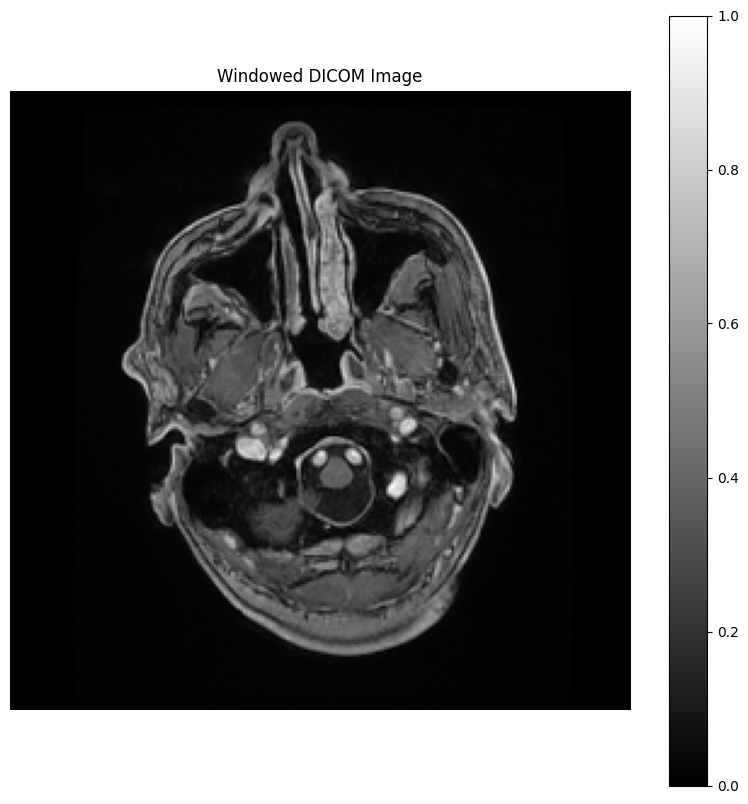

In [8]:
# Apply window/level settings
window_center = float(ds.WindowCenter)
window_width = float(ds.WindowWidth)

# Function to apply windowing
def apply_windowing(image, center, width):
    img_min = center - width // 2
    img_max = center + width // 2
    windowed_image = np.clip(image, img_min, img_max)
    # Normalize to 0-1 range
    windowed_image = (windowed_image - img_min) / (img_max - img_min)
    return windowed_image

# Apply windowing and display
windowed_image = apply_windowing(pixel_array, window_center, window_width)
plt.figure(figsize=(10, 10))
plt.imshow(windowed_image, cmap='gray')
plt.colorbar()
plt.title('Windowed DICOM Image')
plt.axis('off')
plt.show()

In [11]:
# from skimage import exposure

# # Enhance contrast using histogram equalization
# equalized_image = exposure.equalize_hist(pixel_array)
# plt.figure(figsize=(10, 10))
# plt.imshow(equalized_image, cmap='gray')
# plt.title('Histogram Equalized Image')
# plt.axis('off')
# plt.show()